# The  Flights Dataset

Here, The Flights Booking Dataset of Various Airlines is a scraped datewise from a famous website in a structured format. The dataset contanins the records of flight travel details between the cities in india. Here, multiple features are present like Source & Destination City, Arrival & Departure Time, Duration & Price of the flight etc.

This data is available as a CSV file. We are going to analyze this data set using the Pandas DataFrame.

This analyse will be helpful for those working in Airlines, Travel domain.

In [13]:
# import the required python libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [21]:
# import the Flights datasets

df=pd.read_csv(r'/content/airlines_flights_data.csv')

In [22]:
df.head(5)

,index,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [23]:
df.shape

(300153, 12)

## Cleaning the data

In [24]:
# Remove the 'index' column
df.drop(columns='index',inplace=True)

In [25]:
df.head(2)

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953


In [26]:
# Get some info about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  object 
 1   flight            300153 non-null  object 
 2   source_city       300153 non-null  object 
 3   departure_time    300153 non-null  object 
 4   stops             300153 non-null  object 
 5   arrival_time      300153 non-null  object 
 6   destination_city  300153 non-null  object 
 7   class             300153 non-null  object 
 8   duration          300153 non-null  float64
 9   days_left         300153 non-null  int64  
 10  price             300153 non-null  int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 25.2+ MB


In [27]:
# Get Statistical summary about the dataset

df.describe()
# df.price show std more difference compare to 25% & 75%

,duration,days_left,price
count,300153.000000,300153.000000,300153.000000
mean,12.221021,26.004751,20889.660523
std,7.191997,13.561004,22697.767366
min,0.830000,1.000000,1105.000000
25%,6.830000,15.000000,4783.000000
50%,11.250000,26.000000,7425.000000
75%,16.170000,38.000000,42521.000000
max,49.830000,49.000000,123071.000000


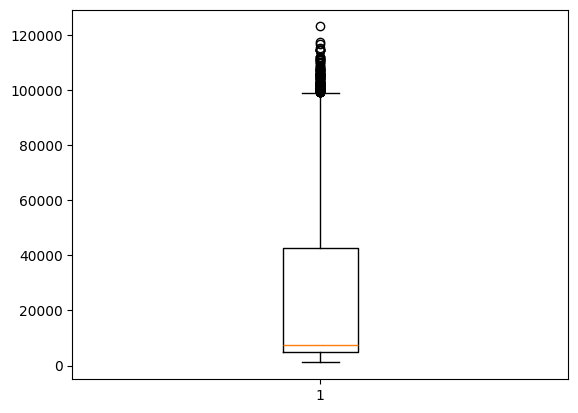

In [28]:
plt.boxplot(df['price'])
plt.show()

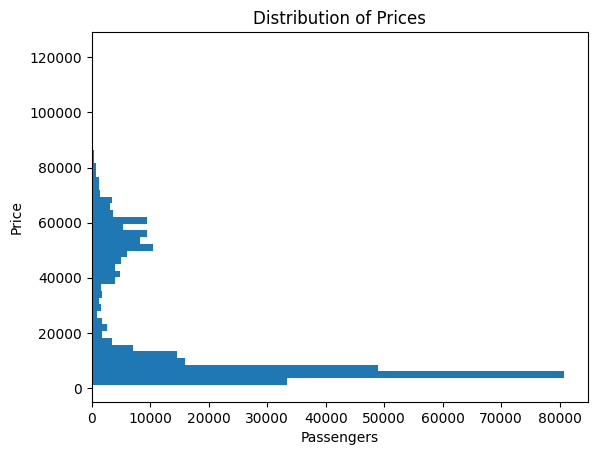

In [29]:
plt.hist(df['price'], orientation='horizontal', bins=50)
plt.xlabel('Passengers')
plt.ylabel('Price')
plt.title('Distribution of Prices')
plt.show()

In [30]:
df.isnull().sum()  # checking for the missing values in any column.

,0
airline,0
flight,0
source_city,0
departure_time,0
stops,0
arrival_time,0
destination_city,0
class,0
duration,0
days_left,0


**Q1. What are the airlines in the dataset, accompanied by their frequencies?**

In [32]:
df.sample(3)

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
284092,Vistara,UK-830,Hyderabad,Morning,one,Morning,Kolkata,Business,22.25,25,51819
27453,Vistara,UK-963,Delhi,Morning,one,Evening,Kolkata,Economy,8.00,42,6578
22469,Air_India,AI-636,Delhi,Afternoon,one,Night,Kolkata,Economy,9.17,15,6311


In [33]:
# Checking how many Airlines are in the datasets.
df.airline.nunique()

6

In [34]:
# Showing the name of the Airlines in the datasets.
df.airline.unique()

array(['SpiceJet', 'AirAsia', 'Vistara', 'GO_FIRST', 'Indigo',
       'Air_India'], dtype=object)

In [35]:
# Showing all the Airlines with their frequencies.
df.airline.value_counts()

,count
airline,
Vistara,127859
Air_India,80892
Indigo,43120
GO_FIRST,23173
AirAsia,16098
SpiceJet,9011


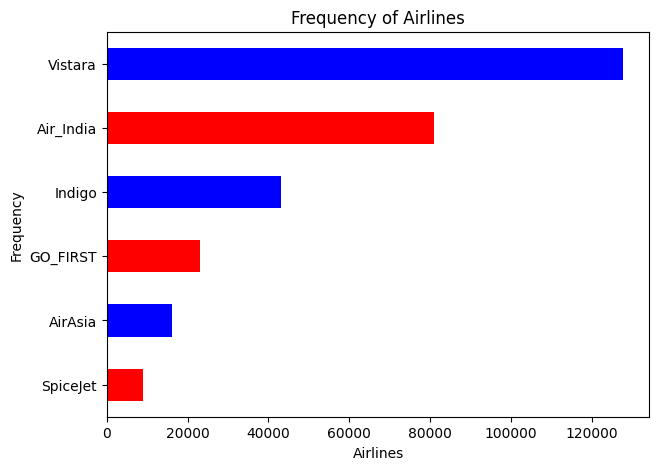

In [36]:
df.airline.value_counts(ascending=True).plot(kind='barh',figsize=(7,5),color=['red', 'blue'],xlabel='Airlines',
                                             ylabel='Frequency',title="Frequency of Airlines")
plt.show()

**Q2. Show Bar Graphs representing the Departure Time & Arrival Time**

In [37]:
df.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [38]:
# Showing the Departure Time for the flights
df.departure_time.value_counts()

,count
departure_time,
Morning,71146
Early_Morning,66790
Evening,65102
Night,48015
Afternoon,47794
Late_Night,1306


In [39]:
# Showing the Arrival_time for the flights
df['arrival_time'].value_counts()

,count
arrival_time,
Night,91538
Evening,78323
Morning,62735
Afternoon,38139
Early_Morning,15417
Late_Night,14001


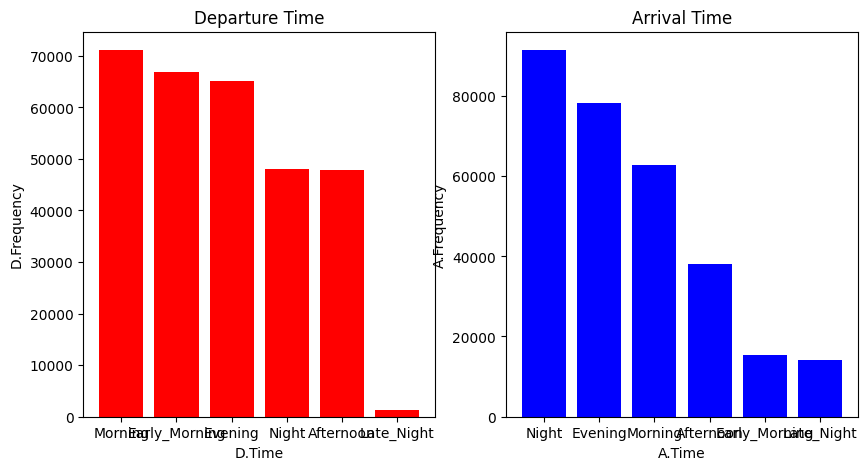

In [40]:
# Showing the Departure Time & Arrival Time for the flights with their counts

plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.bar(df.departure_time.value_counts().index,df.departure_time.value_counts().values,color='red')
plt.xlabel('D.Time')
plt.ylabel('D.Frequency')
plt.title('Departure Time')

plt.subplot(1,2,2)
plt.bar(df.arrival_time.value_counts().index,df.arrival_time.value_counts().values,color='blue')
plt.xlabel('A.Time')
plt.ylabel('A.Frequency')
plt.title('Arrival Time')

plt.show()

**Q3. Show Bar Graphs Representing the Source City & Destination City.**

In [41]:
df.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [42]:
# Showing the Source City of the flights

df.source_city.value_counts()

,count
source_city,
Delhi,61343
Mumbai,60896
Bangalore,52061
Kolkata,46347
Hyderabad,40806
Chennai,38700


In [43]:
# Showing Destination city of the flights

df.destination_city.value_counts()

,count
destination_city,
Mumbai,59097
Delhi,57360
Bangalore,51068
Kolkata,49534
Hyderabad,42726
Chennai,40368


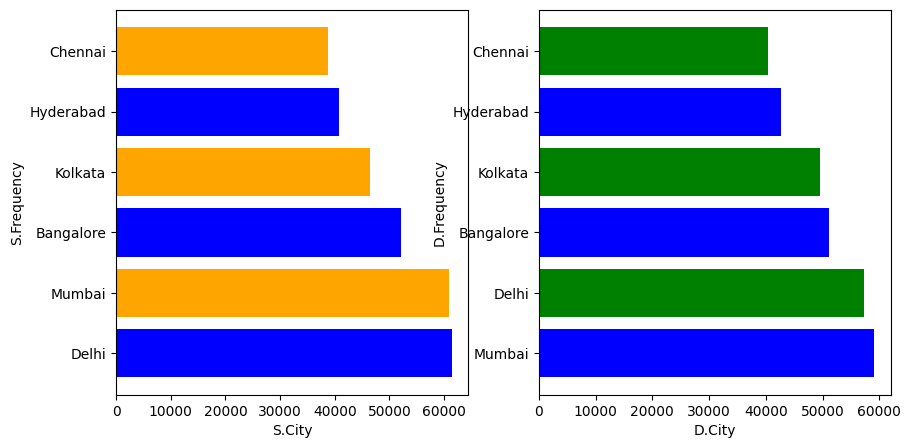

In [46]:
from matplotlib import color_sequences
# Showing the Source City & Destination City for the flights with their counts

plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.barh( df['source_city'].value_counts().index,df['source_city'].value_counts().values,color=['b','orange'])
plt.xlabel('S.City')
plt.ylabel('S.Frequency')

plt.subplot(1,2,2)
plt.barh( df['destination_city'].value_counts().index,df['destination_city'].value_counts().values,color=['blue','green'])
plt.xlabel('D.City')
plt.ylabel('D.Frequency')

plt.show()

**Q4. Does price varies with airlines?**

In [47]:
df.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [48]:
# Grouping the airlines and checking their mean price.

df.groupby('airline')['price'].mean().round(0)

,price
airline,
AirAsia,4091.0
Air_India,23507.0
GO_FIRST,5652.0
Indigo,5324.0
SpiceJet,6179.0
Vistara,30397.0


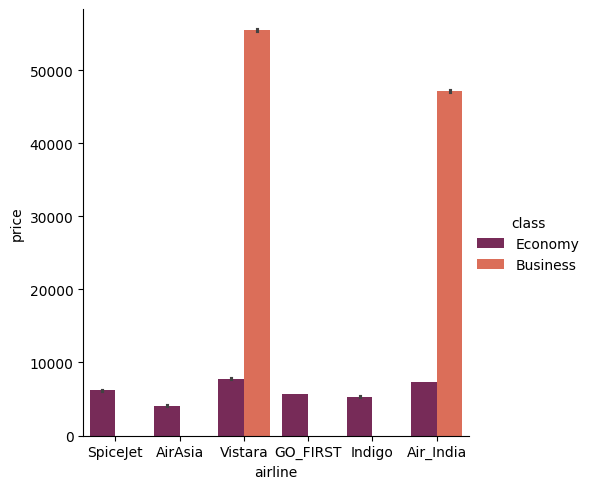

In [49]:
# Drawing a categorical Plot showing the mean ticket price for each Airline
sns.catplot(x='airline',y='price',kind='bar',palette='rocket',data=df,hue='class')
plt.show()

**Q5. Does ticket price change based on the departure time and arrival time?**

In [50]:
df.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [51]:
# Checking the Mean Ticket Price based on the Departure Times

df.groupby('departure_time')['price'].mean().round(0)

,price
departure_time,
Afternoon,18179.0
Early_Morning,20371.0
Evening,21232.0
Late_Night,9295.0
Morning,21631.0
Night,23062.0


In [52]:
# Checking the Mean Ticket Price based on the Arrival Times

df.groupby('arrival_time')['price'].mean().round(0)

,price
arrival_time,
Afternoon,18495.0
Early_Morning,14993.0
Evening,23044.0
Late_Night,11285.0
Morning,22231.0
Night,21587.0


In [ ]:
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.barh( df['source_city'].value_counts().index,df['source_city'].value_counts().values,color=['b','orange'])
plt.xlabel('S.City')
plt.ylabel('S.Frequency')

plt.subplot(1,2,2)
plt.barh( df['destination_city'].value_counts().index,df['destination_city'].value_counts().values,color=['blue','green'])
plt.xlabel('D.City')
plt.ylabel('D.Frequency')

plt.show()

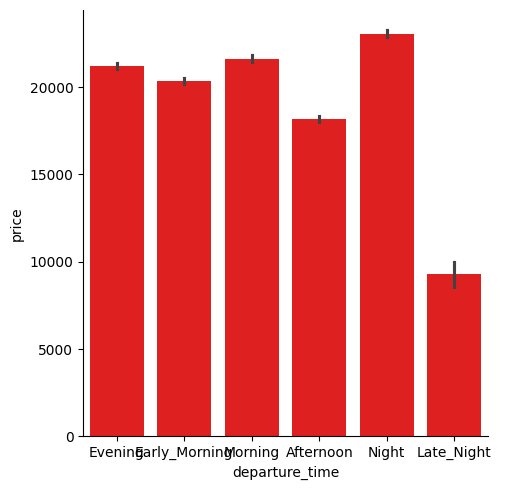

In [63]:
sns.catplot(x='departure_time',y='price',kind='bar',data=df,color='red')
plt.show()

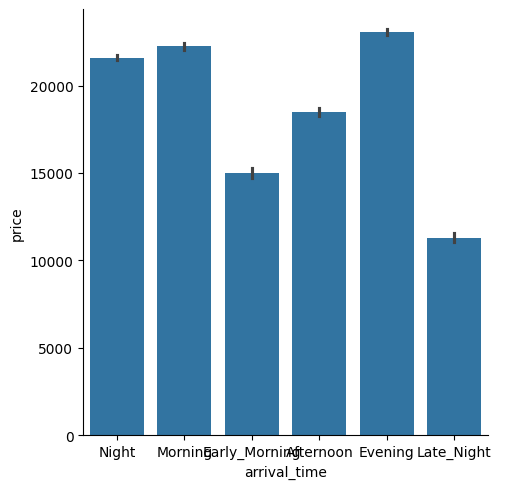

In [64]:
sns.catplot(x='arrival_time',y='price',kind='bar',data=df)
plt.show()

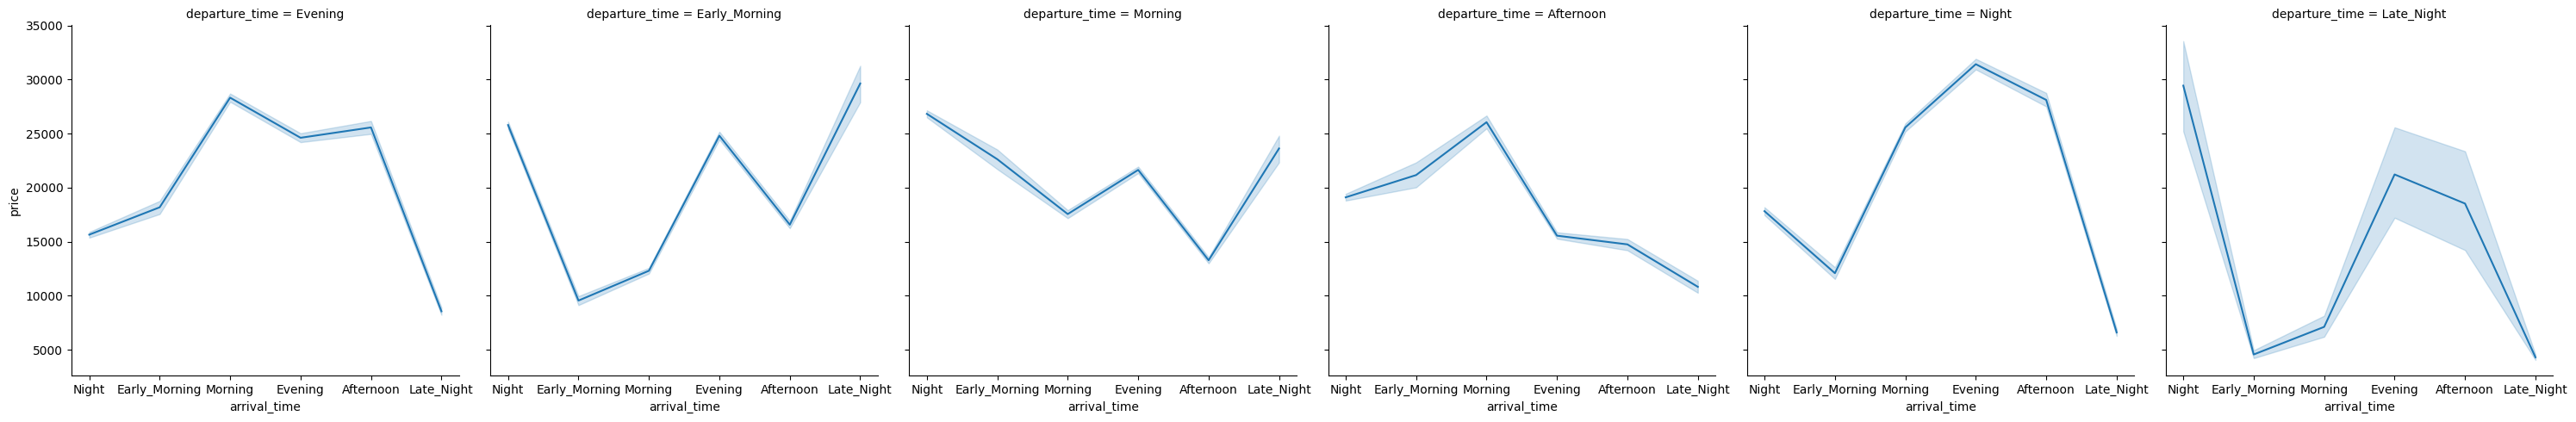

In [66]:
sns.relplot(x='arrival_time',y='price',col='departure_time',data=df, kind='line')
plt.show()
#

**Q6. How the price changes with change in Source and Destination?**

In [68]:
df.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [69]:
# Checking the Mean Tickets price for each Source City
df.groupby('source_city')['price'].mean().round(0)

,price
source_city,
Bangalore,21469.0
Chennai,21995.0
Delhi,18951.0
Hyderabad,20156.0
Kolkata,21746.0
Mumbai,21484.0


In [70]:
# Checking the Mean Tickets price for each Destination City
df.groupby('destination_city')['price'].mean().round(0)

,price
destination_city,
Bangalore,21594.0
Chennai,21953.0
Delhi,18437.0
Hyderabad,20428.0
Kolkata,21960.0
Mumbai,21373.0


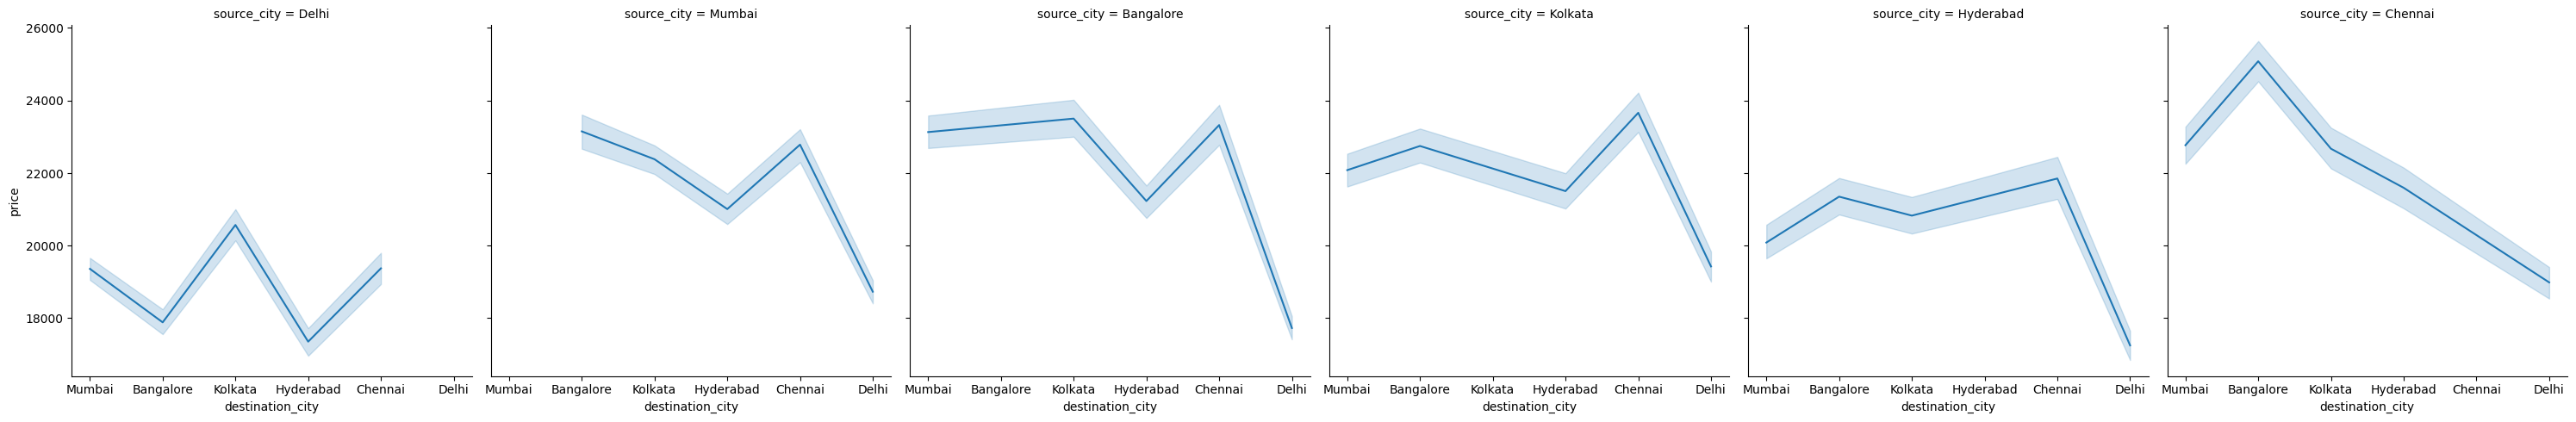

In [71]:
sns.relplot(x='destination_city',y='price',kind='line',data=df,col='source_city')
plt.show()

**Q7. How is the price affected when tickets are bought in just 1 or 2 days before departure?**

In [72]:
df.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [73]:
df['days_left'].nunique()

49

In [74]:
df['days_left'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])

In [80]:
# Checking the Mean Ticket Price for different days_left

df.groupby('days_left')['price'].mean()

,price
days_left,
1,21591.867151
2,30211.299801
3,28976.083569
4,25730.905653
5,26679.773368
6,24856.493902
7,25588.367351
8,24895.883995
9,25726.246072


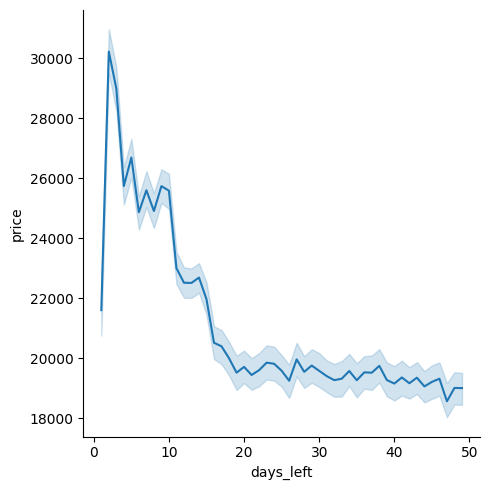

In [81]:
sns.relplot(x='days_left',y='price',kind='line',data=df)
plt.show()

**Q8. How does the ticket price vary between Economy and Business class?**

In [82]:
df.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [83]:
df['class'].unique()

array(['Economy', 'Business'], dtype=object)

In [88]:
x=df[df['class']== "Economy"]
x

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...
206661,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Economy,13.83,49,7697
206662,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Economy,13.83,49,7709
206663,Vistara,UK-826,Chennai,Afternoon,one,Morning,Hyderabad,Economy,20.58,49,8640
206664,Vistara,UK-822,Chennai,Morning,one,Morning,Hyderabad,Economy,23.33,49,8640


In [89]:
x.price.mean()

np.float64(6572.342383362527)

In [90]:
y=df[df['class']== "Business"]
y

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
206666,Air_India,AI-868,Delhi,Evening,zero,Evening,Mumbai,Business,2.00,1,25612
206667,Air_India,AI-624,Delhi,Evening,zero,Night,Mumbai,Business,2.25,1,25612
206668,Air_India,AI-531,Delhi,Evening,one,Night,Mumbai,Business,24.75,1,42220
206669,Air_India,AI-839,Delhi,Night,one,Night,Mumbai,Business,26.50,1,44450
206670,Air_India,AI-544,Delhi,Evening,one,Night,Mumbai,Business,6.67,1,46690
...,...,...,...,...,...,...,...,...,...,...,...
300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


In [91]:
y.price.mean()

np.float64(52540.08112357868)

Q9. What will be the Average Price of Vistata airline for a flight from Delhi to Hyderbad in Business class?

In [92]:
df.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [102]:
x2=df[(df['airline']== 'Vistara') & (df['source_city']=='Delhi')& (df['destination_city']=='Hyderabad')
& (df['class']=='Business')]
x2

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
219123,Vistara,UK-871,Delhi,Night,zero,Night,Hyderabad,Business,2.33,1,30630
219124,Vistara,UK-879,Delhi,Evening,zero,Evening,Hyderabad,Business,2.25,1,38470
219129,Vistara,UK-955,Delhi,Evening,one,Night,Hyderabad,Business,27.17,1,63513
219130,Vistara,UK-955,Delhi,Evening,one,Afternoon,Hyderabad,Business,18.50,1,65764
219131,Vistara,UK-985,Delhi,Evening,one,Night,Hyderabad,Business,25.08,1,69113
...,...,...,...,...,...,...,...,...,...,...,...
221863,Vistara,UK-963,Delhi,Morning,one,Early_Morning,Hyderabad,Business,23.00,49,53937
221864,Vistara,UK-985,Delhi,Evening,one,Early_Morning,Hyderabad,Business,12.00,49,59537
221865,Vistara,UK-985,Delhi,Evening,one,Afternoon,Hyderabad,Business,16.42,49,59537
221866,Vistara,UK-955,Delhi,Evening,one,Early_Morning,Hyderabad,Business,14.08,49,61889


In [103]:
x2['price'].mean()

np.float64(47939.840361445786)

**By - Dilip**